<a href="https://colab.research.google.com/github/pavan03ds/Feature-Engineering/blob/main/10_Outliers_and_It's_Impact_on_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier ---
2. SVM ------
                              Not Sensitive To Outliers
                              Not Sensitive To Outliers
                                Sensitive To Outliers
                                Sensitive To Outliers
3. Linear Regression --------
4. Logistic Regression ..
5. Decision Tree Regressor or Classifier ---- Not Sensitive
6. Ensemble(RF,XGboost,GB)---
7. KNN ------
8. Kmeans
9. Hierarichal
10. PCA ---
11. Neural Networks
                         ***
                          II
                             ***
                             ** **
                                  Not Sensitive
                                  Not Sensitive
                                  Sensitive
                                  Sensitive
                                  Sensitive
                                  Sensitive 

Which Machine Learning Models Are Sensitive To Outliers?
 1. Naivye Bayes Classifier --- Not Sensitive To Outliers
 2. SVM -------- Not Sensitive To Outliers
 3. Linear Regression-Sensitive To Outliers
 4. Logistic Regression ------- Sensitive To Outliers
 5. Decision Tree Regressor or Classifier ---- Not Sensitive
 6. Ensemble(RF,XGboost,GB)------- Not Sensitive
 7. KNN ------------- Not Sensitive
 8. Kmeans ...... Sensitive       
 9. Hierarichal --- Sensitive
10. PCA ...  Sensitive
11. Neural Networks -------------- Sensitive


In [86]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic.csv')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.Age.isna().sum()

177

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

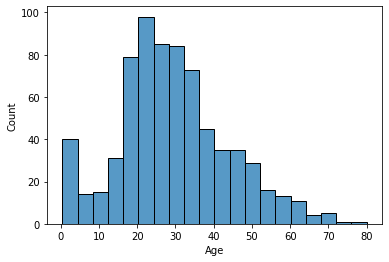

In [138]:
sns.histplot(df['Age'].dropna())
plt.show()

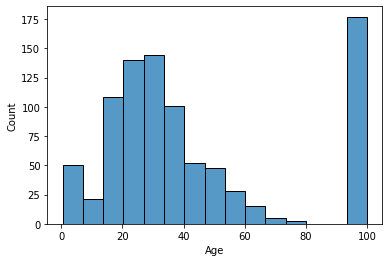

In [139]:
sns.histplot(df['Age'].fillna(100))   #creating the outlier by fiilling Na with 100
plt.show()

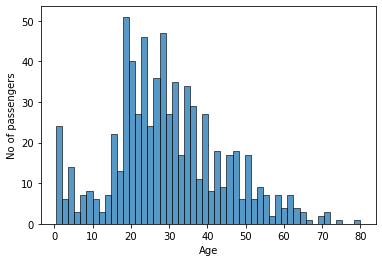

In [92]:
sns.histplot(x='Age',data=df,bins=50)
plt.ylabel('No of passengers')
plt.show()

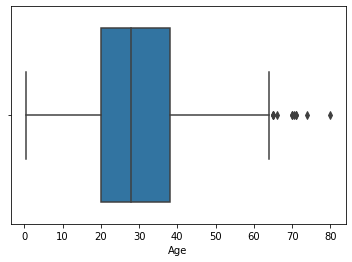

In [93]:
sns.boxplot(x=df['Age'])
plt.show()

In [94]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
#After assuming that Age is nomally distributed ,we calculate the boundries(-3 * std and +3 * std)
upper_boundry = df['Age'].mean() + 3 * df['Age'].std()
lower_boundry = df['Age'].mean() - 3 * df['Age'].std()
lower_boundry, df.Age.mean(), upper_boundry

(-13.880374349943303, 29.69911764705882, 73.27860964406094)

In [96]:
#let's calculate IQR
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [97]:
lower_bridge = df.Age.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.Age.quantile(0.75) + (IQR * 1.5)
lower_bridge, upper_bridge 

(-6.6875, 64.8125)

Here in Age where data is Gaussian distributed extreme boundries are not good

In [98]:
#extreme boundries 
E_lower_bridge = df.Age.quantile(0.25) - (IQR * 3)
E_upper_bridge = df.Age.quantile(0.75) + (IQR * 3)
E_lower_bridge, E_upper_bridge 

(-33.5, 91.625)

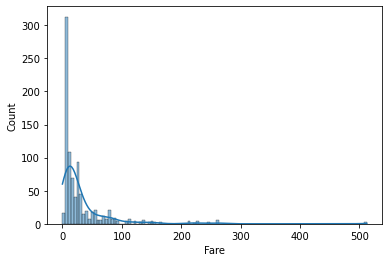

In [99]:
#Fare
sns.histplot(x=df['Fare'],kde=True)

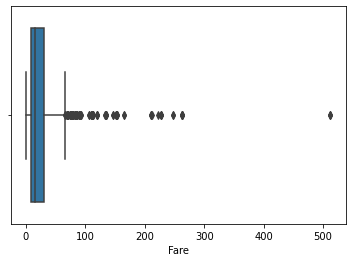

In [100]:
sns.boxplot(x=df['Fare'])

In [101]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [102]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [103]:
lower_bridge = df.Fare.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 1.5)
lower_bridge, upper_bridge 

(-26.724, 65.6344)

Here, in Fare where the data is skewed taking extreme outliers is good

In [62]:
#extreme Outliers
E_lower_bridge = df.Fare.quantile(0.25) - (IQR * 3)
E_upper_bridge = df.Fare.quantile(0.75) + (IQR * 3)
E_lower_bridge, E_upper_bridge 

(-61.358399999999996, 100.2688)

In [128]:
data = df.copy()

In [129]:
data.loc[data['Age']>=73,'Age'] = 73

In [130]:
data.loc[data['Fare']>=100,'Fare'] = 100

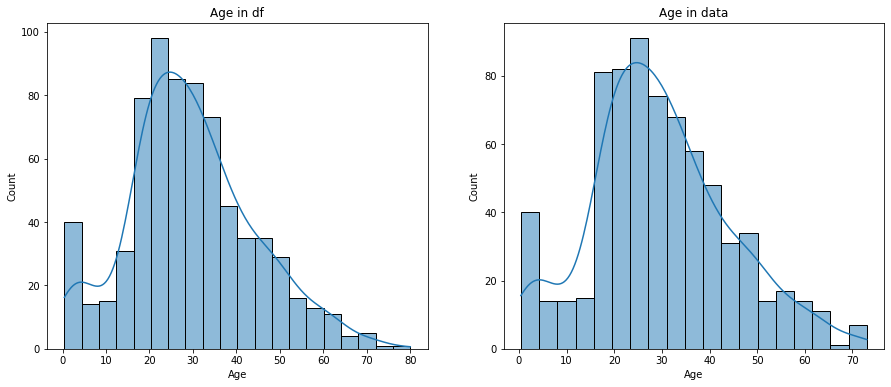

In [137]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x=df['Age'],kde=True)
plt.title('Age in df')

plt.subplot(1,2,2)
sns.histplot(x=data['Age'],kde=True)
plt.title('Age in data')
plt.show()

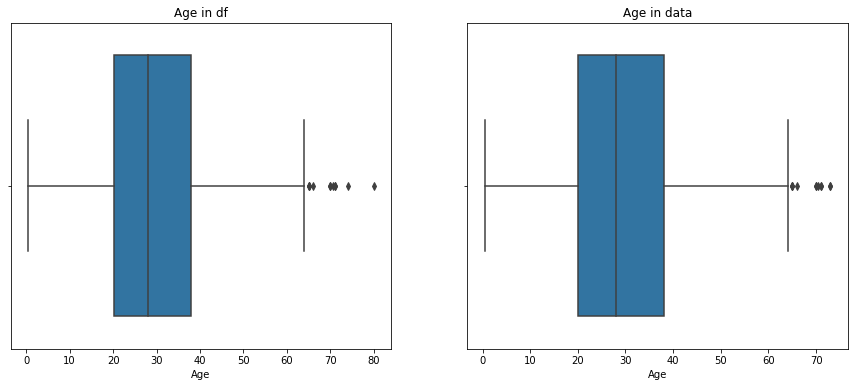

In [135]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Age in df')

plt.subplot(1,2,2)
sns.boxplot(x=data['Age'])
plt.title('Age in data')
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [141]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6604477611940298
roc_auc_score: 0.6935388613276636
